<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the train dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-11-03 21:02:08--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-11-03 21:02:08 (14.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



###### Lets download the test dataset

In [3]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-11-03 21:02:13--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-11-03 21:02:14 (311 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load the Train and Test Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')


df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
test_df = pd.read_csv("loan_test.csv")

test_df.sample(n = 5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
22,147,147,PAIDOFF,300,7,9/12/2016,9/18/2016,37,Master or Above,male
39,295,295,PAIDOFF,1000,30,9/14/2016,10/13/2016,30,college,female
26,169,169,PAIDOFF,1000,30,9/12/2016,10/11/2016,38,college,male
50,349,349,COLLECTION,800,15,9/11/2016,9/25/2016,29,college,male
7,48,48,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male


### Preprocessing the train and test data

In [6]:
dataset = [df, test_df]
for data in dataset:
    print(data.shape)

#df.shape

(346, 10)
(54, 10)


In [7]:
dataset = [test_df, df]
for data in dataset:
    print(data.isna().sum(), sep = " ")

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64
Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64


In [8]:
dataset = [test_df, df]
for data in dataset:
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
Unnamed: 0        54 non-null int64
Unnamed: 0.1      54 non-null int64
loan_status       54 non-null object
Principal         54 non-null int64
terms             54 non-null int64
effective_date    54 non-null object
due_date          54 non-null object
age               54 non-null int64
education         54 non-null object
Gender            54 non-null object
dtypes: int64(5), object(5)
memory usage: 4.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null obje

### Convert to date time object 

In [9]:
dataset = [test_df, df]
for data in dataset:
    
    data['due_date'] = pd.to_datetime(data['due_date'])
    data['effective_date'] = pd.to_datetime(data['effective_date'])

data.sample(n = 5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
305,356,356,COLLECTION,1000,30,2016-09-11,2016-10-10,45,High School or Below,male
68,82,82,PAIDOFF,1000,15,2016-09-11,2016-09-25,29,college,male
334,387,387,COLLECTION,1000,30,2016-09-11,2016-10-10,36,High School or Below,male
308,359,359,COLLECTION,1000,30,2016-09-11,2016-10-10,28,High School or Below,male
24,28,28,PAIDOFF,1000,30,2016-09-11,2016-10-10,31,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [10]:
dataset = [test_df, df]
for data in dataset:
    data['loan_status'].value_counts()

data['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [11]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



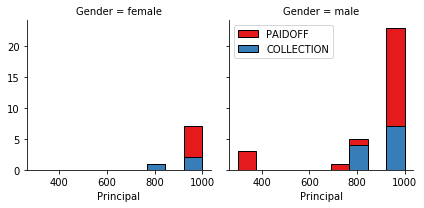

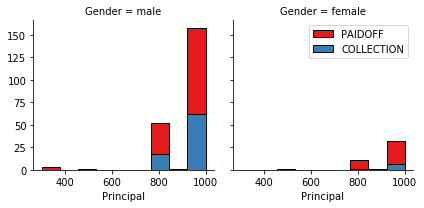

In [12]:
import seaborn as sns

dataset = [test_df, df]
for data in dataset:
    
    bins = np.linspace(data.Principal.min(), data.Principal.max(), 10)
    g = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
    g.map(plt.hist, 'Principal', bins=bins, ec="k")

    g.axes[-1].legend()
plt.show()

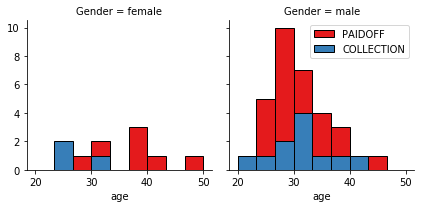

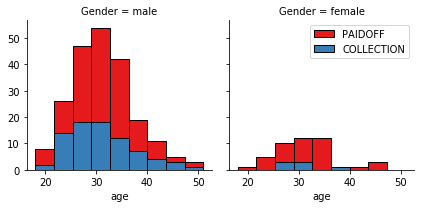

In [13]:
dataset = [test_df, df]
for data in dataset:
    
    bins = np.linspace(data.age.min(), data.age.max(), 10)
    g = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
    g.map(plt.hist, 'age', bins=bins, ec="k")

    g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

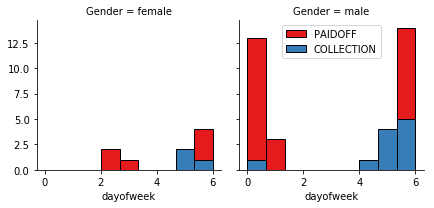

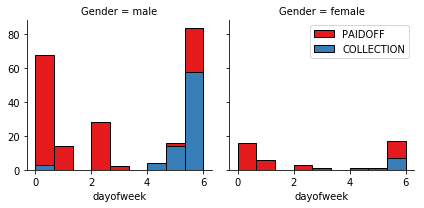

In [14]:
dataset = [test_df, df]
for data in dataset:

    data['dayofweek'] = data['effective_date'].dt.dayofweek
    bins = np.linspace(data.dayofweek.min(), data.dayofweek.max(), 10)
    g = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
    g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
    g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [15]:
data.sample(n = 5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
134,159,159,PAIDOFF,1000,30,2016-09-12,2016-10-11,27,High School or Below,male,0
260,300,300,COLLECTION,1000,15,2016-09-09,2016-09-23,29,college,male,4
345,399,399,COLLECTION,1000,30,2016-09-12,2016-10-11,26,college,male,0
256,296,296,PAIDOFF,800,15,2016-09-14,2016-09-28,27,college,male,2
84,104,104,PAIDOFF,1000,15,2016-09-11,2016-09-25,35,college,male,6


In [16]:
dataset = [test_df, df]
for data in dataset:

    data['weekend'] = data['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [17]:
dataset = [test_df, df]
for data in dataset:

    dg = data.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
dg

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [18]:
from sklearn.preprocessing import LabelEncoder

dataset = [test_df, df]
for data in dataset:

    le = LabelEncoder()
    data["Gender"] = le.fit_transform(data["Gender"])

#data['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
data.sample(n = 5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
332,385,385,COLLECTION,1000,30,2016-09-11,2016-11-09,26,High School or Below,1,6,1
164,193,193,PAIDOFF,1000,30,2016-09-12,2016-10-11,27,High School or Below,0,0,0
45,54,54,PAIDOFF,1000,30,2016-09-11,2016-10-10,21,High School or Below,1,6,1
247,285,285,PAIDOFF,1000,30,2016-09-14,2016-11-12,34,Bechalor,1,2,0
84,104,104,PAIDOFF,1000,15,2016-09-11,2016-09-25,35,college,1,6,1


## One Hot Encoding  
#### How about education?

In [19]:
dataset = [test_df, df]
for data in dataset:
    dv = data.education.value_counts()
dv

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [20]:
dataset = [test_df, df]
for data in dataset:
    data.education.replace(to_replace = ["Bechalor"], value = ["Bachelor"], inplace = True)

In [21]:
dataset = [test_df, df]
for data in dataset:
    d = data.groupby(['education'])['loan_status'].value_counts(normalize=True)

d

education             loan_status
Bachelor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [22]:
dataset = [test_df, df]
for data in dataset:
    data[['Principal','terms','age','Gender','education']].sample(n = 10)

data[['Principal','terms','age','Gender','education']].sample(n = 10)

,Principal,terms,age,Gender,education
331,1000,30,29,1,High School or Below
171,800,15,27,1,college
12,1000,7,27,1,High School or Below
342,1000,30,25,1,High School or Below
264,800,15,28,1,college
68,1000,15,29,1,college
35,1000,7,31,1,Bachelor
108,1000,30,38,1,Bachelor
47,1000,30,27,1,High School or Below
92,1000,30,33,1,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [23]:
dataset = [test_df, df]
for data in dataset:

    Feature = data[['Principal','terms','age','Gender','weekend']]
    Feature = pd.concat([Feature,pd.get_dummies(data['education'])], axis=1)
    Feature.drop(['Master or Above'], axis = 1,inplace=True)

Feature.head()

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,1,1,0,0,1


In [24]:
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bachelor,0,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,1,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,0,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,1,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bachelor,1,6,1


In [25]:
Feature.shape

(346, 8)

### Feature selection

Lets defind feature sets, X:

In [26]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,1,1,0,0,1


What are our lables?

In [27]:
Y = df['loan_status'].values
Y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [28]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555,  0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, -2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, -2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [29]:
#splitting the train set to get the best k

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print("Train set: ", X_train.shape, Y_train.shape)
print("Test set: ", X_test.shape, Y_test.shape)

Train set:  (276, 8) (276,)
Test set:  (70, 8) (70,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [31]:
#checking the accuracy of the Ks to pick the best

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):
    
    #train m odel and predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_hat, Y_test)
    
    std_acc[n-1] = np.std(y_hat == Y_test)/np.sqrt(y_hat.shape[0])

mean_acc

array([0.77142857, 0.61428571, 0.77142857, 0.65714286, 0.77142857,
       0.72857143, 0.77142857, 0.67142857, 0.71428571])

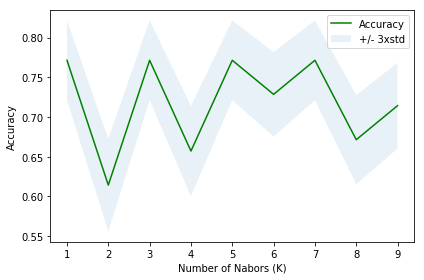

In [32]:
plt.plot(range(1, Ks), mean_acc, "g")
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend(("Accuracy", "+/- 3xstd"))
plt.ylabel("Accuracy")
plt.xlabel("Number of Nabors (K)")
plt.tight_layout()
plt.show()

In [33]:
print("The best accuracy was with", mean_acc.max(), "with K =", mean_acc.argmax()+1)

The best accuracy was with 0.7714285714285715 with K = 1


In [34]:
Y = le.fit_transform(df["loan_status"])

In [35]:
#we use k = 1

KNN = KNeighborsClassifier(n_neighbors = 1).fit(X, Y)

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

LoanTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
LoanTree.fit(X_train, Y_train)
LT1 = LoanTree.predict(X_test)
acc1 = metrics.accuracy_score(LT1, Y_test)
print("criterion = ENTROPY and max_depth = 4:", acc1)

LoanTree = DecisionTreeClassifier(criterion = "entropy", max_depth = None)
LoanTree.fit(X_train, Y_train)
LT2 = LoanTree.predict(X_test)
acc2 = metrics.accuracy_score(LT2, Y_test)
print("criterion = ENTROPY and max_depth = None:", acc2)

LoanTree = DecisionTreeClassifier(criterion = "gini", max_depth = 4)
LoanTree.fit(X_train, Y_train)
LT3 = LoanTree.predict(X_test)
acc3 = metrics.accuracy_score(LT3, Y_test)
print("criterion = GINI and max_depth = 4:", acc3)

LoanTree = DecisionTreeClassifier(criterion = "gini", max_depth = None)
LoanTree.fit(X_train, Y_train)
LT4 = LoanTree.predict(X_test)
acc4 = metrics.accuracy_score(LT4, Y_test)
print("criterion = GINI and max_depth = None:", acc4)

criterion = ENTROPY and max_depth = 4: 0.7
criterion = ENTROPY and max_depth = None: 0.6571428571428571
criterion = GINI and max_depth = 4: 0.7
criterion = GINI and max_depth = None: 0.6571428571428571


In [37]:
#using the best tuning

LoanTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
LoanTree.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Support Vector Machine

In [38]:
from sklearn import svm

SVM1 = svm.SVC(kernel = "rbf").fit(X_train, Y_train)
SVM1_pred = SVM1.predict(X_test)
acc1 = metrics.accuracy_score(SVM1_pred, Y_test)
print("KERNEL = RBF: ", acc1)

SVM2 = svm.SVC(kernel = "linear").fit(X_train, Y_train)
SVM2_pred = SVM1.predict(X_test)
acc2 = metrics.accuracy_score(SVM2_pred, Y_test)
print("KERNEL = LINEAR: ", acc2)

SVM3 = svm.SVC(kernel = "sigmoid").fit(X_train, Y_train)
SVM3_pred = SVM3.predict(X_test)
acc3 = metrics.accuracy_score(SVM3_pred, Y_test)
print("KERNEL = SIGMOID", acc3)

KERNEL = RBF:  0.6857142857142857
KERNEL = LINEAR:  0.6857142857142857
KERNEL = SIGMOID 0.6428571428571429


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [39]:
#We will use kernel = "rbf" to train our full train dataset.

SVM1 = svm.SVC(kernel = "rbf").fit(X, Y)

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.01, solver = "liblinear").fit(X_train, Y_train)
LR1 = LR.predict(X_test)
acc1 = metrics.accuracy_score(LR1, Y_test)
print("solver = liblinear:", acc1)

LR = LogisticRegression(C = 0.01, solver = "newton-cg").fit(X_train, Y_train)
LR2 = LR.predict(X_test)
acc2 = metrics.accuracy_score(LR2, Y_test)
print("solver = newton-cg:", acc2)

LR = LogisticRegression(C = 0.01, solver = "lbfgs").fit(X_train, Y_train)
LR3 = LR.predict(X_test)
acc3 = metrics.accuracy_score(LR3, Y_test)
print("solver = lbfgs:", acc3)

LR = LogisticRegression(C = 0.01, solver = "sag").fit(X_train, Y_train)
LR4 = LR.predict(X_test)
acc4 = metrics.accuracy_score(LR4, Y_test)
print("solver = sag:", acc4)

LR = LogisticRegression(C = 0.01, solver = "saga").fit(X_train, Y_train)
LR5 = LR.predict(X_test)
acc5 = metrics.accuracy_score(LR5, Y_test)
print("solver = saga:", acc5)

solver = liblinear: 0.7
solver = newton-cg: 0.8
solver = lbfgs: 0.8
solver = sag: 0.8
solver = saga: 0.8


In [41]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.01, solver = "newton-cg").fit(X, Y)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

# Model Evaluation using Test set

In [42]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Test set evaluation 

In [43]:
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bachelor,0,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,1,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,0,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,1,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bachelor,1,6,1


In [44]:
test_df.shape

(54, 12)

In [45]:
#test feature before one hot encoding

test_df[['Principal','terms','age','Gender','education']].sample(n = 10)

,Principal,terms,age,Gender,education
11,300,7,35,1,college
14,1000,30,37,0,High School or Below
2,1000,30,43,0,High School or Below
28,1000,30,33,1,Bachelor
52,800,15,36,1,High School or Below
32,1000,30,29,1,college
34,1000,15,36,1,High School or Below
13,1000,30,37,0,college
26,1000,30,38,1,college
6,1000,15,24,1,college


In [46]:
#Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

Input = test_df[["Principal", "terms", "age", "Gender", "weekend"]]
Input = pd.concat([Input, pd.get_dummies(test_df["education"])], axis = 1)
Input.drop(["Master or Above"], axis = 1, inplace = True)
Input.sample(n = 5)

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
45,1000,30,20,1,1,0,1,0
14,1000,30,37,0,1,0,1,0
37,800,15,23,1,0,0,0,1
8,800,15,27,0,1,0,0,1
51,1000,30,37,1,1,0,1,0


In [47]:
#defining X and Y of test dataset

test_X = Input
test_X[ : 5]

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,50,0,0,1,0,0
1,300,7,35,1,1,0,0,0
2,1000,30,43,0,1,0,1,0
3,1000,30,26,1,1,0,0,1
4,800,15,29,1,1,1,0,0


In [48]:
test_Y = le.fit_transform(test_df["loan_status"])
test_Y[ : 5]

array([1, 1, 1, 1, 1])

In [49]:
#To normalize test_X

test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[ : 5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[ 0.49362588,  0.92844966,  3.05981865, -1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288,  0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596, -1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057,  0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942,  0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [50]:
#MODEL EVALUATION

#KNN
KNN_pred = KNN.predict(test_X)
KNN_j = jaccard_similarity_score(KNN_pred, test_Y)
KNN_f = f1_score(KNN_pred, test_Y)
KNN_LL = log_loss(KNN_pred, test_Y)

#DECISION TREE
Tree_pred = LoanTree.predict(test_X)
Tree_j = jaccard_similarity_score(Tree_pred, test_Y)
Tree_f = f1_score(Tree_pred, test_Y)
Tree_LL = log_loss(test_Y, Tree_pred)

#SVM
SVM_pred = SVM1.predict(test_X)
SVM_j = jaccard_similarity_score(SVM_pred, test_Y)
SVM_f = f1_score(SVM_pred, test_Y)
SVM_LL = log_loss(SVM_pred, test_Y)

#LOGISTIC REGRESSION
LR_pred = LR.predict(test_X)
LR_j = jaccard_similarity_score(LR_pred, test_Y)
LR_f = f1_score(LR_pred, test_Y)
LR_LL = log_loss(test_Y, LR_pred)


In [51]:
ACC_Metrics = pd.DataFrame({"Algorithm" : ["KNN", "Desicion Tree", "SVM", "Logistic Regression"], "Jaccard" : [KNN_j, Tree_j, SVM_j, LR_j],
                            "F1-score" : [KNN_f, Tree_f, SVM_f, LR_f],
                            "LogLoss" : [KNN_LL, Tree_LL, SVM_LL, LR_LL]})

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

In [52]:
#REPORT

ACC_Metrics

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.703704,0.804878,10.233815
1,Desicion Tree,0.777778,0.866667,7.675447
2,SVM,0.722222,0.838710,9.594119
3,Logistic Regression,0.740741,0.851064,8.954705


## CONCLUSION

Decision Tree model performed better than the rest for this classification problem.

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>